In [2]:
import numpy as np
import pandas as pd



import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pyplot as pp
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from datetime import date, time, datetime, timedelta 
import calendar
import glob
import folium 
import statistics

%matplotlib inline

In [3]:
#csv_files = glob.glob('Datasets/RideIndego 2016/*.csv')
#df = pd.concat([pd.read_csv(f) for f  in csv_files], ignore_index = True)

In [60]:
#df.head ()

In [61]:
#df.nunique()

# Average uses per bicycle 

In [6]:
#calculate trips per bike
use_bikes = df.groupby(["bike_id"], as_index=False)["trip_id"].count()

In [7]:
use_bikes["trips"] = use_bikes["trip_id"]

In [8]:
use_bikes.drop("trip_id",axis= 1,inplace=True)

In [96]:
#use_bikes.head()


In [57]:
#average trips per bike
y = statistics.mean(use_bikes["trips"])
y

639.705078125

In [58]:
#maximum trips per bike
max__= use_bikes["trips"].max()
max__

1057

In [59]:
#minimun trips per bike
min__ = use_bikes["trips"].min()
min__

18

In [19]:
#average trips per bike daily
use_bikes["trip/day"] = use_bikes["trips"].div(356)

In [20]:
#average trips per bike hourly
use_bikes["trip/hour"] = use_bikes["trips"].div(8760)

In [21]:
use_bikes.drop("trip",axis= 1,inplace=True)

In [22]:
use_bikes.head()

,bike_id,trips,trip/day,trip/hour
0,2472,681,1.912921,0.077740
1,2473,690,1.938202,0.078767
2,2474,627,1.761236,0.071575
3,2475,691,1.941011,0.078881
4,2476,646,1.814607,0.073744


In [53]:
#average trips per bike(hourly)
mean = statistics.mean(use_bikes["trip/hour"])
mean

0.07302569384988584

In [55]:
#maximum trips per bike(hourly)
max_ = use_bikes["trip/hour"].max()
max_

0.120662100456621

In [56]:
#minimun trips per bike(hourly)
min_ = use_bikes["trip/hour"].min()
min_

0.002054794520547945

In [32]:
#ajusting start_time to datetime type
df["start_time"] = pd.to_datetime(df["start_time"])
df['date_hour'] = df['start_time'].dt.strftime('%m-%d-%H')
df["hour"] = df["start_time"].apply(lambda dt: dt.hour)

In [62]:
#df.head()

In [38]:
#merging the datasets
bikes_info = pd.merge(df,use_bikes, on="bike_id")

In [39]:
#droping the irrelevant columns
bikes_info.drop(["plan_duration","trip_route_category","passholder_type","start_lon","start_lat","end_lat","end_lon"],axis=1, inplace =True)

### Selecting  specific bicycles as example

In [98]:
bike_info = bikes_info[bikes_info["bike_id"] == 5348]
bike_info = bike_info.groupby(["hour"])["trip_id"].nunique()
bike_info = pd.DataFrame(bike_info1)
bike_info.head()


,trip_id
hour,
0,1
3,1
6,1
9,3
10,1


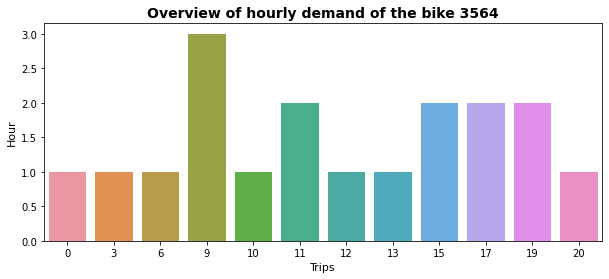

In [99]:
fig, ax = pp.subplots(figsize=(10,4))

sns.barplot(x=bike_info.index.get_level_values(0), y=bike_info["trip_id"],ax=ax)
pp.xlabel("Trips", fontdict={'size':11})
pp.ylabel("Hour", fontdict={"size":11})
pp.title("Overview of hourly demand of the bike 3564", fontsize=14.0, fontweight='bold')

pp.show()

In [63]:
#bike_info.head()

In [100]:
bike_info1 = bikes_info[bikes_info["bike_id"] == 3724]
bike_info1 = bike_info1.groupby(["hour"])["trip_id"].nunique()
bike_info1 = pd.DataFrame(bike_info1)
bike_info1.head()


,trip_id
hour,
0,10
1,7
2,8
3,3
4,2


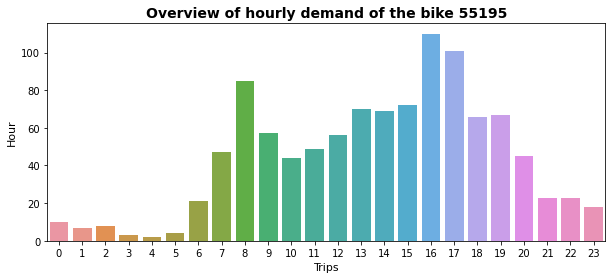

In [101]:
fig, ax = pp.subplots(figsize=(10,4))

sns.barplot(x=bike_info1.index.get_level_values(0), y=bike_info1["trip_id"],ax=ax)
pp.xlabel("Trips", fontdict={'size':11})
pp.ylabel("Hour", fontdict={"size":11})
pp.title("Overview of hourly demand of the bike 55195", fontsize=14.0, fontweight='bold')

pp.show()

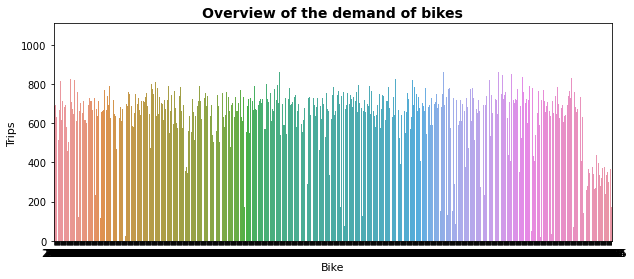

In [102]:
fig, ax = pp.subplots(figsize=(10,4))

sns.barplot(x=use_bikes["bike_id"], y=use_bikes["trips"],ax=ax)
pp.xlabel("Bike", fontdict={'size':11})
pp.ylabel("Trips", fontdict={"size":11})
pp.title("Overview of the demand of bikes", fontsize=14.0, fontweight='bold')

pp.show()